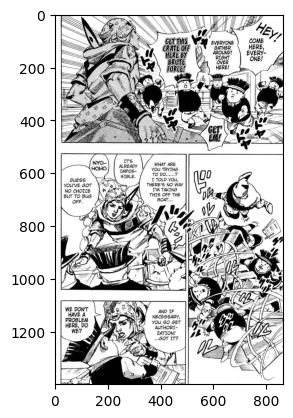

In [1]:
import cv2
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import easyocr

image_path = '../data/images/jojo-no-kimyou-na-bouken-part-7-steel-ball-run-chapter-95/36.jpg'

plt.imshow(cv2.imread(image_path))

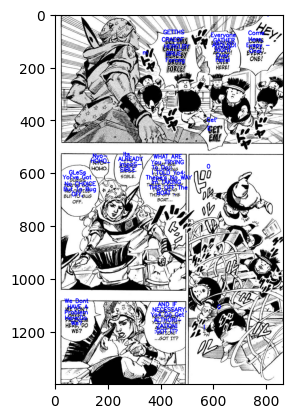

True

In [14]:


# Initialize the EasyOCR Reader with GPU support (use True for GPU, False for CPU)
reader = easyocr.Reader(['en'], gpu=True)  # English language, GPU enabled

# Path to the image
image_path = '../data/images/36.jpg'

# Perform OCR on the image (EasyOCR automatically handles text orientation)
result = reader.readtext(image_path)

# Load the image using OpenCV
image = cv2.imread(image_path)

# Draw the bounding boxes and text on the image
for (bbox, text, prob) in result:
    # Extract the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw the bounding box
    # cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Display the OCR text
    cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# Display the image with bounding boxes and recognized text
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

output_image_path = '../data/images/36_output.jpg'
cv2.imwrite(output_image_path, image)

In [2]:
# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Path to your image
image_path = '../data/images/36.jpg'

# Perform OCR on the image
result = ocr.ocr(image_path, cls=False)

# # Extract bounding boxes and text
boxes = [line[0] for line in result[0]]
texts = [line[1][0] for line in result[0]]

# # Print bounding boxes and text
for box, text in zip(boxes, texts):
    print(f"Box: {box}, Text: {text}")

# Visualize the results
image = Image.open(image_path).convert('RGB')

[2024/10/19 20:08:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/akxy4321/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/akxy4321/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

In [3]:
for idx in range(len(result)):
    res = result[idx]
    if res == None:
        continue
    boxes = [line[0] for line in res]
    txts = [line[1][0] for line in res]
    scores = [line[1][1] for line in res]
    im_show = draw_ocr(image, boxes, txts, scores, font_path = '../data/fonts/SourceCodePro-Regular.otf')
    im_show = Image.fromarray(im_show)
    im_show.save(f'image_with_bounding_boxes{idx}.jpg')

In [9]:
# groq_translation.py
import json
from typing import Optional

from groq import Groq
from pydantic import BaseModel

# Set up the Groq client
client = Groq(api_key="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")

# Model for the translation
class Translation(BaseModel):
    text: str
    comments: Optional[str] = None


# Translate text using the Groq API
def groq_translate(query, from_language, to_language):
    # Create a chat completion
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": f"You are a helpful assistant that translates text from {from_language} to {to_language}."
                           f"You will only reply with the translation text and nothing else in JSON."
                           f" The JSON object must use the schema: {json.dumps(Translation.model_json_schema(), indent=2)}",
            },
            {
                "role": "user",
                "content": f"Translate '{query}' from {from_language} to {to_language}."
            }
        ],
        model="llama3-70b-8192", # "llama-3.2-90b-text-preview"
        temperature=0.2,
        max_tokens=1024,
        stream=False,
        response_format={"type": "json_object"},
    )
    # Return the translated text
    return Translation.model_validate_json(chat_completion.choices[0].message.content)

In [14]:
boxes

[[[773.0, 23.0], [860.0, 62.0], [841.0, 108.0], [754.0, 70.0]],
 [[414.0, 88.0], [504.0, 88.0], [504.0, 118.0], [414.0, 118.0]],
 [[734.0, 90.0], [791.0, 90.0], [791.0, 112.0], [734.0, 112.0]],
 [[590.0, 101.0], [677.0, 101.0], [677.0, 117.0], [590.0, 117.0]],
 [[407.0, 115.0], [513.0, 115.0], [513.0, 141.0], [407.0, 141.0]],
 [[729.0, 107.0], [791.0, 111.0], [789.0, 139.0], [727.0, 135.0]],
 [[598.0, 118.0], [666.0, 115.0], [667.0, 135.0], [599.0, 139.0]],
 [[413.0, 140.0], [499.0, 140.0], [499.0, 171.0], [413.0, 171.0]],
 [[594.0, 137.0], [669.0, 134.0], [670.0, 154.0], [595.0, 158.0]],
 [[722.0, 136.0], [799.0, 136.0], [799.0, 160.0], [722.0, 160.0]],
 [[603.0, 155.0], [661.0, 151.0], [663.0, 173.0], [605.0, 177.0]],
 [[735.0, 158.0], [788.0, 158.0], [788.0, 179.0], [735.0, 179.0]],
 [[426.0, 169.0], [494.0, 169.0], [494.0, 197.0], [426.0, 197.0]],
 [[610.0, 174.0], [658.0, 174.0], [658.0, 194.0], [610.0, 194.0]],
 [[420.0, 194.0], [496.0, 191.0], [498.0, 223.0], [421.0, 226.0]],
 [

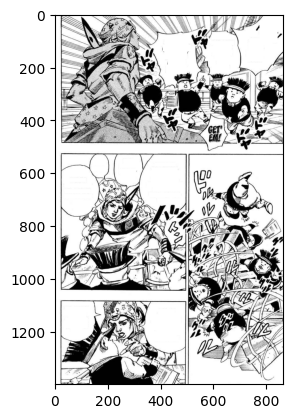

In [4]:
# prompt: these are the contents of boxes : [[[416.0, 278.0], [483.0, 276.0], [483.0, 294.0], [417.0, 296.0]],
#  [[417.0, 294.0], [482.0, 294.0], [482.0, 312.0], [417.0, 312.0]],
#  [[429.0, 312.0], [470.0, 312.0], [470.0, 330.0], [429.0, 330.0]],
#  [[422.0, 330.0], [478.0, 330.0], [478.0, 347.0], [422.0, 347.0]],
#  [[421.0, 346.0], [478.0, 346.0], [478.0, 364.0], [421.0, 364.0]],
#  [[423.0, 365.0], [473.0, 365.0], [473.0, 382.0], [423.0, 382.0]]]. Draw a white box in the numpy image called 'image' and store the contents in a new image

import numpy as np
from PIL import Image

# Assuming 'image' is your NumPy image and 'boxes' is the list of bounding boxes

image_np = np.array(image)  # Convert PIL Image to NumPy array if needed

new_image = image_np.copy()  # Create a copy of the image to draw on

for box in boxes:
  x1, y1 = int(min(box[0][0], box[1][0])), int(min(box[0][1], box[1][1]))
  x2, y2 = int(max(box[2][0], box[3][0])), int(max(box[2][1], box[3][1]))
  cv2.rectangle(new_image, (x1, y1), (x2, y2), (255, 255, 255), -1)  # Draw a white filled rectangle

new_image_pil = Image.fromarray(new_image)
# Now you can save or display the new_image_pil
new_image_pil.save('image_with_white_boxes.jpg')
plt.imshow(new_image_pil)

In [5]:
def get_bounding_box(rectangle):
    """
    Given a rectangle defined by its corner coordinates, return the bounding box.

    Parameters:
    - rectangle: A list of four points, where each point is a list of [x, y].

    Returns:
    - A tuple (x_min, y_min, x_max, y_max) representing the bounding box.
    """
    x_coords = [point[0] for point in rectangle]
    y_coords = [point[1] for point in rectangle]

    x_min = min(x_coords)
    y_min = min(y_coords)
    x_max = max(x_coords)
    y_max = max(y_coords)

    return (x_min, y_min, x_max, y_max)

# Get bounding boxes for each rectangle
bounding_boxes = [get_bounding_box(rect) for rect in boxes]

bounding_boxes

[(754.0, 23.0, 860.0, 108.0),
 (414.0, 88.0, 504.0, 118.0),
 (734.0, 90.0, 791.0, 112.0),
 (590.0, 101.0, 677.0, 117.0),
 (407.0, 115.0, 513.0, 141.0),
 (727.0, 107.0, 791.0, 139.0),
 (598.0, 115.0, 667.0, 139.0),
 (413.0, 140.0, 499.0, 171.0),
 (594.0, 134.0, 670.0, 158.0),
 (722.0, 136.0, 799.0, 160.0),
 (603.0, 151.0, 663.0, 177.0),
 (735.0, 158.0, 788.0, 179.0),
 (426.0, 169.0, 494.0, 197.0),
 (610.0, 174.0, 658.0, 194.0),
 (420.0, 191.0, 498.0, 226.0),
 (605.0, 189.0, 659.0, 215.0),
 (140.0, 551.0, 194.0, 573.0),
 (258.0, 547.0, 298.0, 566.0),
 (242.0, 567.0, 312.0, 583.0),
 (375.0, 561.0, 457.0, 576.0),
 (138.0, 575.0, 197.0, 595.0),
 (242.0, 585.0, 306.0, 605.0),
 (365.0, 580.0, 464.0, 596.0),
 (246.0, 605.0, 306.0, 626.0),
 (363.0, 593.0, 467.0, 622.0),
 (56.0, 620.0, 117.0, 636.0),
 (360.0, 615.0, 469.0, 637.0),
 (34.0, 640.0, 138.0, 656.0),
 (345.0, 636.0, 486.0, 655.0),
 (36.0, 662.0, 134.0, 678.0),
 (369.0, 656.0, 464.0, 672.0),
 (33.0, 681.0, 140.0, 697.0),
 (356.0, 675.0,

In [6]:
def intersecting_boxes(box1, box2, threshold=10):
    """
    Check if two boxes intersect with a given threshold, considering both expansion (+threshold)
    and contraction (-threshold).

    Args:
        box1 (list): Coordinates of the first box [(x1, y1), (x2, y2), (x3, y3), (x4, y4)].
        box2 (list): Coordinates of the second box [(x1, y1), (x2, y2), (x3, y3), (x4, y4)].
        threshold (float): Distance threshold for considering boxes as intersecting.

    Returns:
        bool: True if the boxes intersect within the threshold, False otherwise.
    """
    
    # Extract x and y coordinates for both boxes
    x1_coords = [point[0] for point in box1]
    x2_coords = [point[0] for point in box2]
    y1_coords = [point[1] for point in box1]
    y2_coords = [point[1] for point in box2]

    # Determine the bounding box for both sets of coordinates
    x1_min, y1_min = min(x1_coords), min(y1_coords)
    x1_max, y1_max = max(x1_coords), max(y1_coords)

    x2_min, y2_min = min(x2_coords), min(y2_coords)
    x2_max, y2_max = max(x2_coords), max(y2_coords)

    # Check if the boxes intersect considering both expansion (+threshold) and contraction (-threshold)
    
    # For x-coordinates
    x_overlap_expanded = not (x1_max + threshold < x2_min or x2_max + threshold < x1_min)
    x_overlap_contracted = not (x1_max - threshold < x2_min or x2_max - threshold < x1_min)
    
    # For y-coordinates
    y_overlap_expanded = not (y1_max + threshold < y2_min or y2_max + threshold < y1_min)
    y_overlap_contracted = not (y1_max - threshold < y2_min or y2_max - threshold < y1_min)

    # Return True if either expanded or contracted ranges overlap in both x and y coordinates
    return (x_overlap_expanded and y_overlap_expanded) or (x_overlap_contracted and y_overlap_contracted)





def merge_boxes(box1, box2):
    """
    Merges two boxes.

    Args:
        box1 (list): The first box.
        box2 (list): The second box.

    Returns:
        list: The merged box.
    """

    x_coords = [point[0] for point in box1+box2]
    y_coords = [point[1] for point in box1+box2]

    x1 = min(x_coords)
    x2 = max(x_coords)
    y1 = min(y_coords)
    y2 = max(y_coords)

    return [(x1, y1), (x2, y1), (x2, y2), (x1, y2)]

def merge_intersecting_boxes(super_boxes):
    """
    Merges intersecting boxes.

    Args:
        boxes (list): A list of boxes.

    Returns:
        list: A list of merged boxes.
    """
    merged_super_boxes = []
    for super_box in super_boxes:
        box, text = super_box
        if not merged_super_boxes:
            merged_super_boxes.append(super_box)
        else:
            intersecting = False
            for i, merged_super_box in enumerate(merged_super_boxes):
                merged_box, merged_text = merged_super_box
                if intersecting_boxes(merged_box, box):

                    new_super_box = (merge_boxes(merged_box, box), merged_text + " " + text)

                    merged_super_boxes[i] = new_super_box
                    intersecting = True
                    break
            if not intersecting:
                merged_super_boxes.append(super_box)
    return merged_super_boxes

super_boxes = list(zip(boxes, texts))
super_boxes.sort(key=lambda super_box:super_box[0][1], reverse=True)
merged_boxes = merge_intersecting_boxes(super_boxes)
merged_boxes = merge_intersecting_boxes(merged_boxes)
merged_boxes = merge_intersecting_boxes(merged_boxes)
merged_boxes = merge_intersecting_boxes(merged_boxes)
print(merged_boxes)

[([(722.0, 23.0), (860.0, 23.0), (860.0, 179.0), (722.0, 179.0)], 'HEY! HERE, COME EVERY- ONE!'), ([(590.0, 101.0), (677.0, 101.0), (677.0, 215.0), (590.0, 215.0)], 'EVERYONE GATHER AROUND! RIGHT OVER HERE!'), ([(407.0, 88.0), (513.0, 88.0), (513.0, 226.0), (407.0, 226.0)], 'CRATEOFF GETTHIS HEREBY BRUTE FORCE!'), ([(345.0, 561.0), (486.0, 561.0), (486.0, 712.0), (345.0, 712.0)], "THERE'S NO WAY I TOLD YOU TO DO..... I'M TAKING YOU TRYING WHAT ARE THIS OFF THE BOAT..."), ([(363.0, 1116.0), (476.0, 1116.0), (476.0, 1238.0), (363.0, 1238.0)], 'YOU GOGET NECESSARY, AUTHORI- ZATION! AND IF ..GOTIT?'), ([(242.0, 547.0), (312.0, 547.0), (312.0, 626.0), (242.0, 626.0)], "ALREADY IMPOS- IT'S SIBLE."), ([(138.0, 551.0), (197.0, 551.0), (197.0, 595.0), (138.0, 595.0)], 'HOHO NYO-'), ([(33.0, 620.0), (140.0, 620.0), (140.0, 720.0), (33.0, 720.0)], "BUT TO BUG NO CHOICE OFF. YOU'VEGOT GUESS"), ([(37.0, 1107.0), (127.0, 1107.0), (127.0, 1212.0), (37.0, 1212.0)], "WEDON'T HAVE A HERE,DO PROBLEM WE?"

[(722.0, 23.0), (860.0, 23.0), (860.0, 179.0), (722.0, 179.0)]
[(590.0, 101.0), (677.0, 101.0), (677.0, 215.0), (590.0, 215.0)]
[(407.0, 88.0), (513.0, 88.0), (513.0, 226.0), (407.0, 226.0)]
[(345.0, 561.0), (486.0, 561.0), (486.0, 712.0), (345.0, 712.0)]
[(363.0, 1116.0), (476.0, 1116.0), (476.0, 1238.0), (363.0, 1238.0)]
[(242.0, 547.0), (312.0, 547.0), (312.0, 626.0), (242.0, 626.0)]
[(138.0, 551.0), (197.0, 551.0), (197.0, 595.0), (138.0, 595.0)]
[(33.0, 620.0), (140.0, 620.0), (140.0, 720.0), (33.0, 720.0)]
[(37.0, 1107.0), (127.0, 1107.0), (127.0, 1212.0), (37.0, 1212.0)]


True

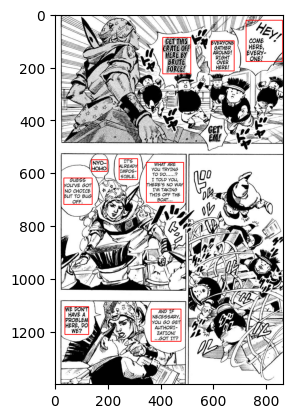

In [7]:
np_image = np.array(image)
for box,text in merged_boxes:
    a, b, c, d = box  # Unpacking the box coordinates
    ycoords = [a[1], b[1], c[1], d[1]]  # Y-coordinates of the box corners
    xcoords = [a[0], b[0], c[0], d[0]]  # X-coordinates of the box corners

    # Calculate the width and height of the bounding box
    width = max(xcoords) - min(xcoords)
    height = max(ycoords) - min(ycoords)

    # Skip boxes with zero width or height
    if width <= 0 or height <= 0:
        continue

    print(box)  # Optional: print the box coordinates for debugging
    # Draw the rectangle on the image
    cv2.rectangle(img=np_image, pt1=(int(min(xcoords)), int(min(ycoords))), \
                    pt2=(int(max(xcoords)), int(max(ycoords))), \
                    color=(255, 0, 0), thickness=2)  # red boxes with thickness 2
import matplotlib.pyplot as plt
plt.imshow(np_image)
cv2.imwrite("image with merged bounding boxes.jpeg", np_image)

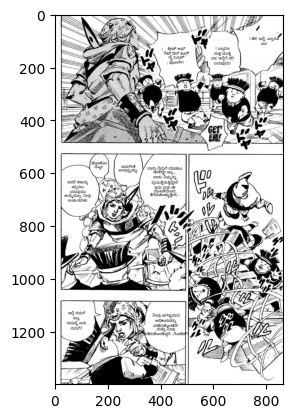

In [11]:
import textwrap
from PIL import Image, ImageDraw, ImageFont

translated_image = new_image_pil.copy()
draw = ImageDraw.Draw(translated_image)
font = ImageFont.truetype("../data/fonts/NotoSansKannada-Regular.ttf", size=20)

def draw_text_in_rectangle(image, text, font_path, box, max_font_size):
    draw = ImageDraw.Draw(image)
    x1, y1, x2, y2 = box
    w, h = x2 - x1, y2 - y1

    for font_size in range(max_font_size, 0, -1):
        font = ImageFont.truetype(font_path, font_size)
        # Initial wrap based on bounding box width
        lines = textwrap.wrap(text, width=int(w / draw.textbbox((0, 0), ' ', font=font)[2]))
        wrapped_lines = []
        for line in lines:
            # Further wrap each line if it exceeds the bounding box width
            while draw.textbbox((0, 0), line, font=font)[2] > w:
                split_index = line.rfind(' ', 0, int(len(line) * w / draw.textbbox((0, 0), line, font=font)[2]))
                if split_index == -1:
                    break
                wrapped_lines.append(line[:split_index])
                line = line[split_index + 1:]
            wrapped_lines.append(line)
        
        total_text_height = sum([draw.textbbox((0, 0), line, font=font)[3] for line in wrapped_lines])
        if total_text_height <= h:
            y_offset = y1 + (h - total_text_height) // 2
            for line in wrapped_lines:
                line_width, line_height = draw.textbbox((0, 0), line, font=font)[2], draw.textbbox((0, 0), line, font=font)[3]
                draw.text(((x1 + (w - line_width) // 2), y_offset), line, font=font, fill="black")
                y_offset += line_height
            break
    return image

# Use the function to draw text in each bounding box
for box, text in merged_boxes:
    translated_text = groq_translate(text, from_language="english", to_language="kannada").text
    translated_image = draw_text_in_rectangle(translated_image, translated_text, "../data/fonts/NotoSansKannada-Regular.ttf", get_bounding_box(box), max_font_size=15)

# Save the image with the translated text
translated_image.save("translated_image_better.jpg")

plt.imshow(translated_image)